<a href="https://colab.research.google.com/github/RYAN073-AI/-S-P-500-Stock-Ranking-System/blob/main/S%26P_500_Stock_Ranking_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv("/content/sp500_companies.csv")#file path

In [3]:
new_df=df1[['Symbol','Shortname']]

In [4]:
new_df

,Symbol,Shortname
0,AAPL,Apple Inc.
1,NVDA,NVIDIA Corporation
2,MSFT,Microsoft Corporation
3,AMZN,"Amazon.com, Inc."
4,GOOGL,Alphabet Inc.
...,...,...
497,CZR,"Caesars Entertainment, Inc."
498,BWA,BorgWarner Inc.
499,QRVO,"Qorvo, Inc."
500,FMC,FMC Corporation


Extracting Stock Data from Yfinance


In [5]:
import numpy as np
import yfinance as yf

def get_stock_info(symbol):
    try:
        stock = yf.Ticker(symbol)  # creating a ticker object for the particular stock
        information = stock.info
        hist = stock.history(period="1y")  # history of the stock for 1 year

        # Calculate 1-year returns
        if len(hist) > 0:
            returns_1y = (hist['Close'].iloc[-1] - hist['Close'].iloc[0]) / hist['Close'].iloc[0]
        else:
            returns_1y = 0

        # Extract key metrics
        data = {
            'Symbol': symbol,
            'PE_Ratio': information.get('trailingPE', np.nan),
            'Price_to_Book': information.get('priceToBook', np.nan),
            'ROE': information.get('returnOnEquity', np.nan) * 100 if information.get('returnOnEquity') else np.nan,
            'Profit_Margin': information.get('profitMargins', np.nan) * 100 if information.get('profitMargins') else np.nan,
            'Debt_to_Equity': information.get('debtToEquity', np.nan),
            'Revenue_Growth': information.get('revenueGrowth', np.nan) * 100 if information.get('revenueGrowth') else np.nan,
            'Current_Ratio': information.get('currentRatio', np.nan),
            'Returns_1Y': returns_1y
        }

        return data

    except Exception as e:

        return None


In [6]:
df1=pd.DataFrame()
data=[]
stock_list=new_df['Symbol'].tolist()
for i in range(400):
  stock_data=get_stock_info(stock_list[i])
  if(stock_data is not None):
    data.append(stock_data)
df1=pd.DataFrame(data)




ERROR:yfinance:$DFS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: HES"}}}
ERROR:yfinance:$HES: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: ANSS"}}}
ERROR:yfinance:$ANSS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


In [8]:
df1.head()

,Symbol,PE_Ratio,Price_to_Book,ROE,Profit_Margin,Debt_to_Equity,Revenue_Growth,Current_Ratio,Returns_1Y
0,AAPL,37.205368,55.535960,171.421990,26.915002,152.411,7.9,0.893,0.123758
1,NVDA,45.898262,37.810710,107.359000,53.007000,9.102,62.5,4.468,0.369813
2,MSFT,34.994310,10.074120,32.241002,35.707000,33.154,18.4,1.401,0.118015
3,AMZN,32.192090,6.589759,24.327000,11.063000,43.405,13.4,1.009,0.012798
4,GOOGL,31.301085,9.898541,35.450000,32.233003,11.424,15.9,1.747,NaN


Create Stock Rating


In [9]:
def create_stock_rating(row):
  score=0
  if pd.notna(row['PE_Ratio']) and row['PE_Ratio']<25:
    score+=1
    #Profitability of a company
  if pd.notna(row['ROE'])and row['ROE']>15:
    score+=1
  if pd.notna(row['Profit_Margin'])and row['Profit_Margin']>100:
    score+=1
  if(pd.notna(row['Revenue_Growth']))and row['Revenue_Growth']>10:
    score+=1
  if pd.notna(row['Returns_1Y']) and row['Returns_1Y'] > 0.15:
     score += 1
  #Judging the financial health of the company
  if pd.notna(row['Debt_to_Equity']) and row['Debt_to_Equity'] <100:
    score+=1
  if pd.notna(row['Current_Ratio']) and row['Current_Ratio'] > 1.5:
    score += 1
    #Growth of the company
  return score





In [10]:
df1['Score'] = df1.apply(create_stock_rating, axis=1)

In [11]:
df1

,Symbol,PE_Ratio,Price_to_Book,ROE,Profit_Margin,Debt_to_Equity,Revenue_Growth,Current_Ratio,Returns_1Y,Score
0,AAPL,37.205368,55.535960,171.421990,26.915002,152.411,7.9,0.893,0.123758,1
1,NVDA,45.898262,37.810710,107.359000,53.007000,9.102,62.5,4.468,0.369813,5
2,MSFT,34.994310,10.074120,32.241002,35.707000,33.154,18.4,1.401,0.118015,3
3,AMZN,32.192090,6.589759,24.327000,11.063000,43.405,13.4,1.009,0.012798,3
4,GOOGL,31.301085,9.898541,35.450000,32.233003,11.424,15.9,1.747,NaN,4
...,...,...,...,...,...,...,...,...,...,...
395,OMC,10.802360,3.063794,27.007000,8.307000,128.056,4.0,0.924,-0.179638,2
396,CTRA,12.435185,1.394311,11.854999,24.691999,27.957,34.9,1.025,0.120673,3
397,HRL,27.160920,1.645199,6.002000,3.950000,38.220,1.5,2.466,-0.266015,2
398,ARE,NaN,0.463643,-1.084000,-13.436000,66.083,-5.0,1.579,-0.539155,2


In [12]:
def assign_hold_sell_buy(row):
  if row['Score']>=5:
    return "BUY"
  if row['Score']>=3 and row['Score']<5:
    return "HOLD"
  if row['Score']<3:
    return 'SELL'
  return None

In [13]:
df1["Hold/Sell/Buy"]=df1.apply(assign_hold_sell_buy,axis=1)

In [ ]:
df1

,Symbol,PE_Ratio,Price_to_Book,ROE,Profit_Margin,Debt_to_Equity,Revenue_Growth,Current_Ratio,Returns_1Y,Score,Hold/Sell/Buy
0,AAPL,37.329320,55.870567,171.421990,26.915002,152.411,7.9,0.893,0.180260,2,SELL
1,NVDA,43.811882,36.181520,107.359000,53.007000,9.102,62.5,4.468,0.280656,5,BUY
2,MSFT,34.968730,10.073915,32.241002,35.707000,33.154,18.4,1.401,0.170452,4,HOLD
3,AMZN,32.894220,6.742996,24.327000,11.063000,43.405,13.4,1.009,0.121843,3,HOLD
4,GOOGL,31.638340,9.995316,35.450000,32.233003,11.424,15.9,1.747,0.903474,5,BUY
...,...,...,...,...,...,...,...,...,...,...,...
395,OMC,10.563422,2.996026,27.007000,8.307000,128.056,4.0,0.924,-0.292378,2,SELL
396,CTRA,12.425925,1.393272,11.854999,24.691999,27.957,34.9,1.025,0.039790,3,HOLD
397,HRL,16.941605,1.579234,9.442000,6.257000,35.301,4.6,2.469,-0.254163,3,HOLD
398,ARE,NaN,0.549430,-1.084000,-13.436000,66.083,-5.0,1.579,-0.482273,2,SELL


Applying Machine Learning Algorithms
 (Import all the required Libraries)

In [14]:
df2=df1# create a copy (Just in Case)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [17]:
encoder=LabelEncoder()
df2['Hold/Sell/Buy']=encoder.fit_transform(df2['Hold/Sell/Buy'])

In [18]:
df2.head()

,Symbol,PE_Ratio,Price_to_Book,ROE,Profit_Margin,Debt_to_Equity,Revenue_Growth,Current_Ratio,Returns_1Y,Score,Hold/Sell/Buy
0,AAPL,37.205368,55.535960,171.421990,26.915002,152.411,7.9,0.893,0.123758,1,2
1,NVDA,45.898262,37.810710,107.359000,53.007000,9.102,62.5,4.468,0.369813,5,0
2,MSFT,34.994310,10.074120,32.241002,35.707000,33.154,18.4,1.401,0.118015,3,1
3,AMZN,32.192090,6.589759,24.327000,11.063000,43.405,13.4,1.009,0.012798,3,1
4,GOOGL,31.301085,9.898541,35.450000,32.233003,11.424,15.9,1.747,NaN,4,1


1->sell
0->hold
2->buy

In [19]:
features=['PE_Ratio','Price_to_Book','ROE','Profit_Margin','Debt_to_Equity','Revenue_Growth','Current_Ratio','Returns_1Y']
X=df2[features].fillna(df2[features].mean())# if there is missing value we will fill it the mean of the all the value of row instead of NaN

In [20]:

y=df2['Hold/Sell/Buy']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale training data
X_train_scaled = scaler.fit_transform(X_train)#when we scale the data we loose the column name as it gets converted it into numpy array to prevent that we convert that in dataframe with column name
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Scale test data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns, index=X_test.index)


Scaler prevents large scale feature domination.     
Example Feature A-salary(10000000 to 100000000000000)
        Feature be age(18-60)
        ACC to the model Feature A will have a more weight in decsion B
        Scalling prevetns imbalance like this
        Generally Linear model require scaling
        Tree based Models do not require scalling
        Because columns with bigger numeric ranges would naturally get larger weights.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Define base models
lr = LogisticRegression(max_iter=200, class_weight='balanced')
svc = SVC(kernel='rbf', probability=True, class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
nb = GaussianNB()
# Voting ensemble
voting = VotingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('rf', rf), ('knn', knn)],
    voting='soft'
)

# Dictionary of models
# Dictionary of models
models = {
    "Logistic Regression": lr,
    "SVM": svc,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Naive Bayes": nb,
    "Voting Ensemble": voting,
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss'
    )
}


create a dictionary of the machine learnign models

In [26]:
result={}
for name,model in models.items():
  if name in("Logistic Regression","SVM","KNN"):
    model.fit(X_train,y_train)
    pred=model.predict(X_test_scaled)


  else:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  result[name]=accuracy
  print(f"Model:{name}")
  print("Accuracy:", accuracy)
  print("\nClassification Report:")
  print(classification_report(y_test, pred))






/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Model:Logistic Regression
Accuracy: 0.578125

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.85      0.30        13
           1       0.56      0.48      0.52       140
           2       0.76      0.64      0.69       167

    accuracy                           0.58       320
   macro avg       0.50      0.66      0.50       320
weighted avg       0.65      0.58      0.60       320

Model:SVM
Accuracy: 0.4375

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.44      1.00      0.61       140
           2       0.00      0.00      0.00       167

    accuracy                           0.44       320
   macro avg       0.15      0.33      0.20       320
weighted avg       0.19      0.44      0.27       320

Model:KNN
Accuracy: 0.4375

Classification Report:
              precision    recall  f1-score   support

           0

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:Voting Ensemble
Accuracy: 0.7375

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.23      0.30        13
           1       0.78      0.58      0.66       140
           2       0.73      0.91      0.81       167

    accuracy                           0.74       320
   macro avg       0.64      0.57      0.59       320
weighted avg       0.74      0.74      0.72       320

Model:XGBoost
Accuracy: 0.734375

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.69      0.49        13
           1       0.81      0.51      0.63       140
           2       0.74      0.92      0.82       167

    accuracy                           0.73       320
   macro avg       0.64      0.71      0.65       320
weighted avg       0.76      0.73      0.72       320



In [27]:
result

{'Logistic Regression': 0.578125,
 'SVM': 0.4375,
 'KNN': 0.4375,
 'Decision Tree': 0.690625,
 'Random Forest': 0.74375,
 'Naive Bayes': 0.5875,
 'Voting Ensemble': 0.7375,
 'XGBoost': 0.734375}

Choose the Best perforrming model and do their hyperparamete tuning


Hyperparemeter Tuning


In [43]:
sorted_result=dict(sorted(result.items(),key=lambda item:item[1],reverse=True))
top_model_name=list(sorted_result.keys())[0]
print("The best performing model is",top_model_name,"with an acuuracy of",sorted_result[top_model_name])

The best performing model is Random Forest with an acuuracy of 0.74375


To improve the accuracy and its performance we will do Hyperparameter tuning inorder to increase the performace
and accuracy


In [36]:
from sklearn.model_selection import GridSearchCV


In [50]:
param_grid = {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'] # 'auto' is deprecated and removed
    }

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=2)

In [51]:
print("\nBest Hyperparameters for Random Forest:")
print(grid_search.best_params_)


Best Hyperparameters for Random Forest:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [52]:
print("\nBest Hyperparameters for Random Forest:")
print(grid_search.best_params_)


Best Hyperparameters for Random Forest:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


Graphs


In [59]:
graph_df=pd.DataFrame(list(result.items()),columns=["Model","Accuracy"])

<BarContainer object of 8 artists>

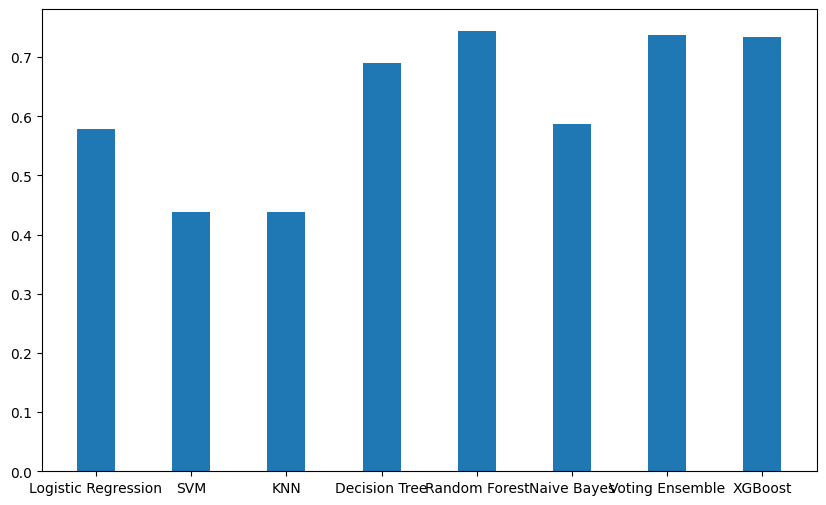

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(graph_df['Model'],graph_df['Accuracy'],data=graph_df,width=0.4,)

In [83]:
import seaborn as sns

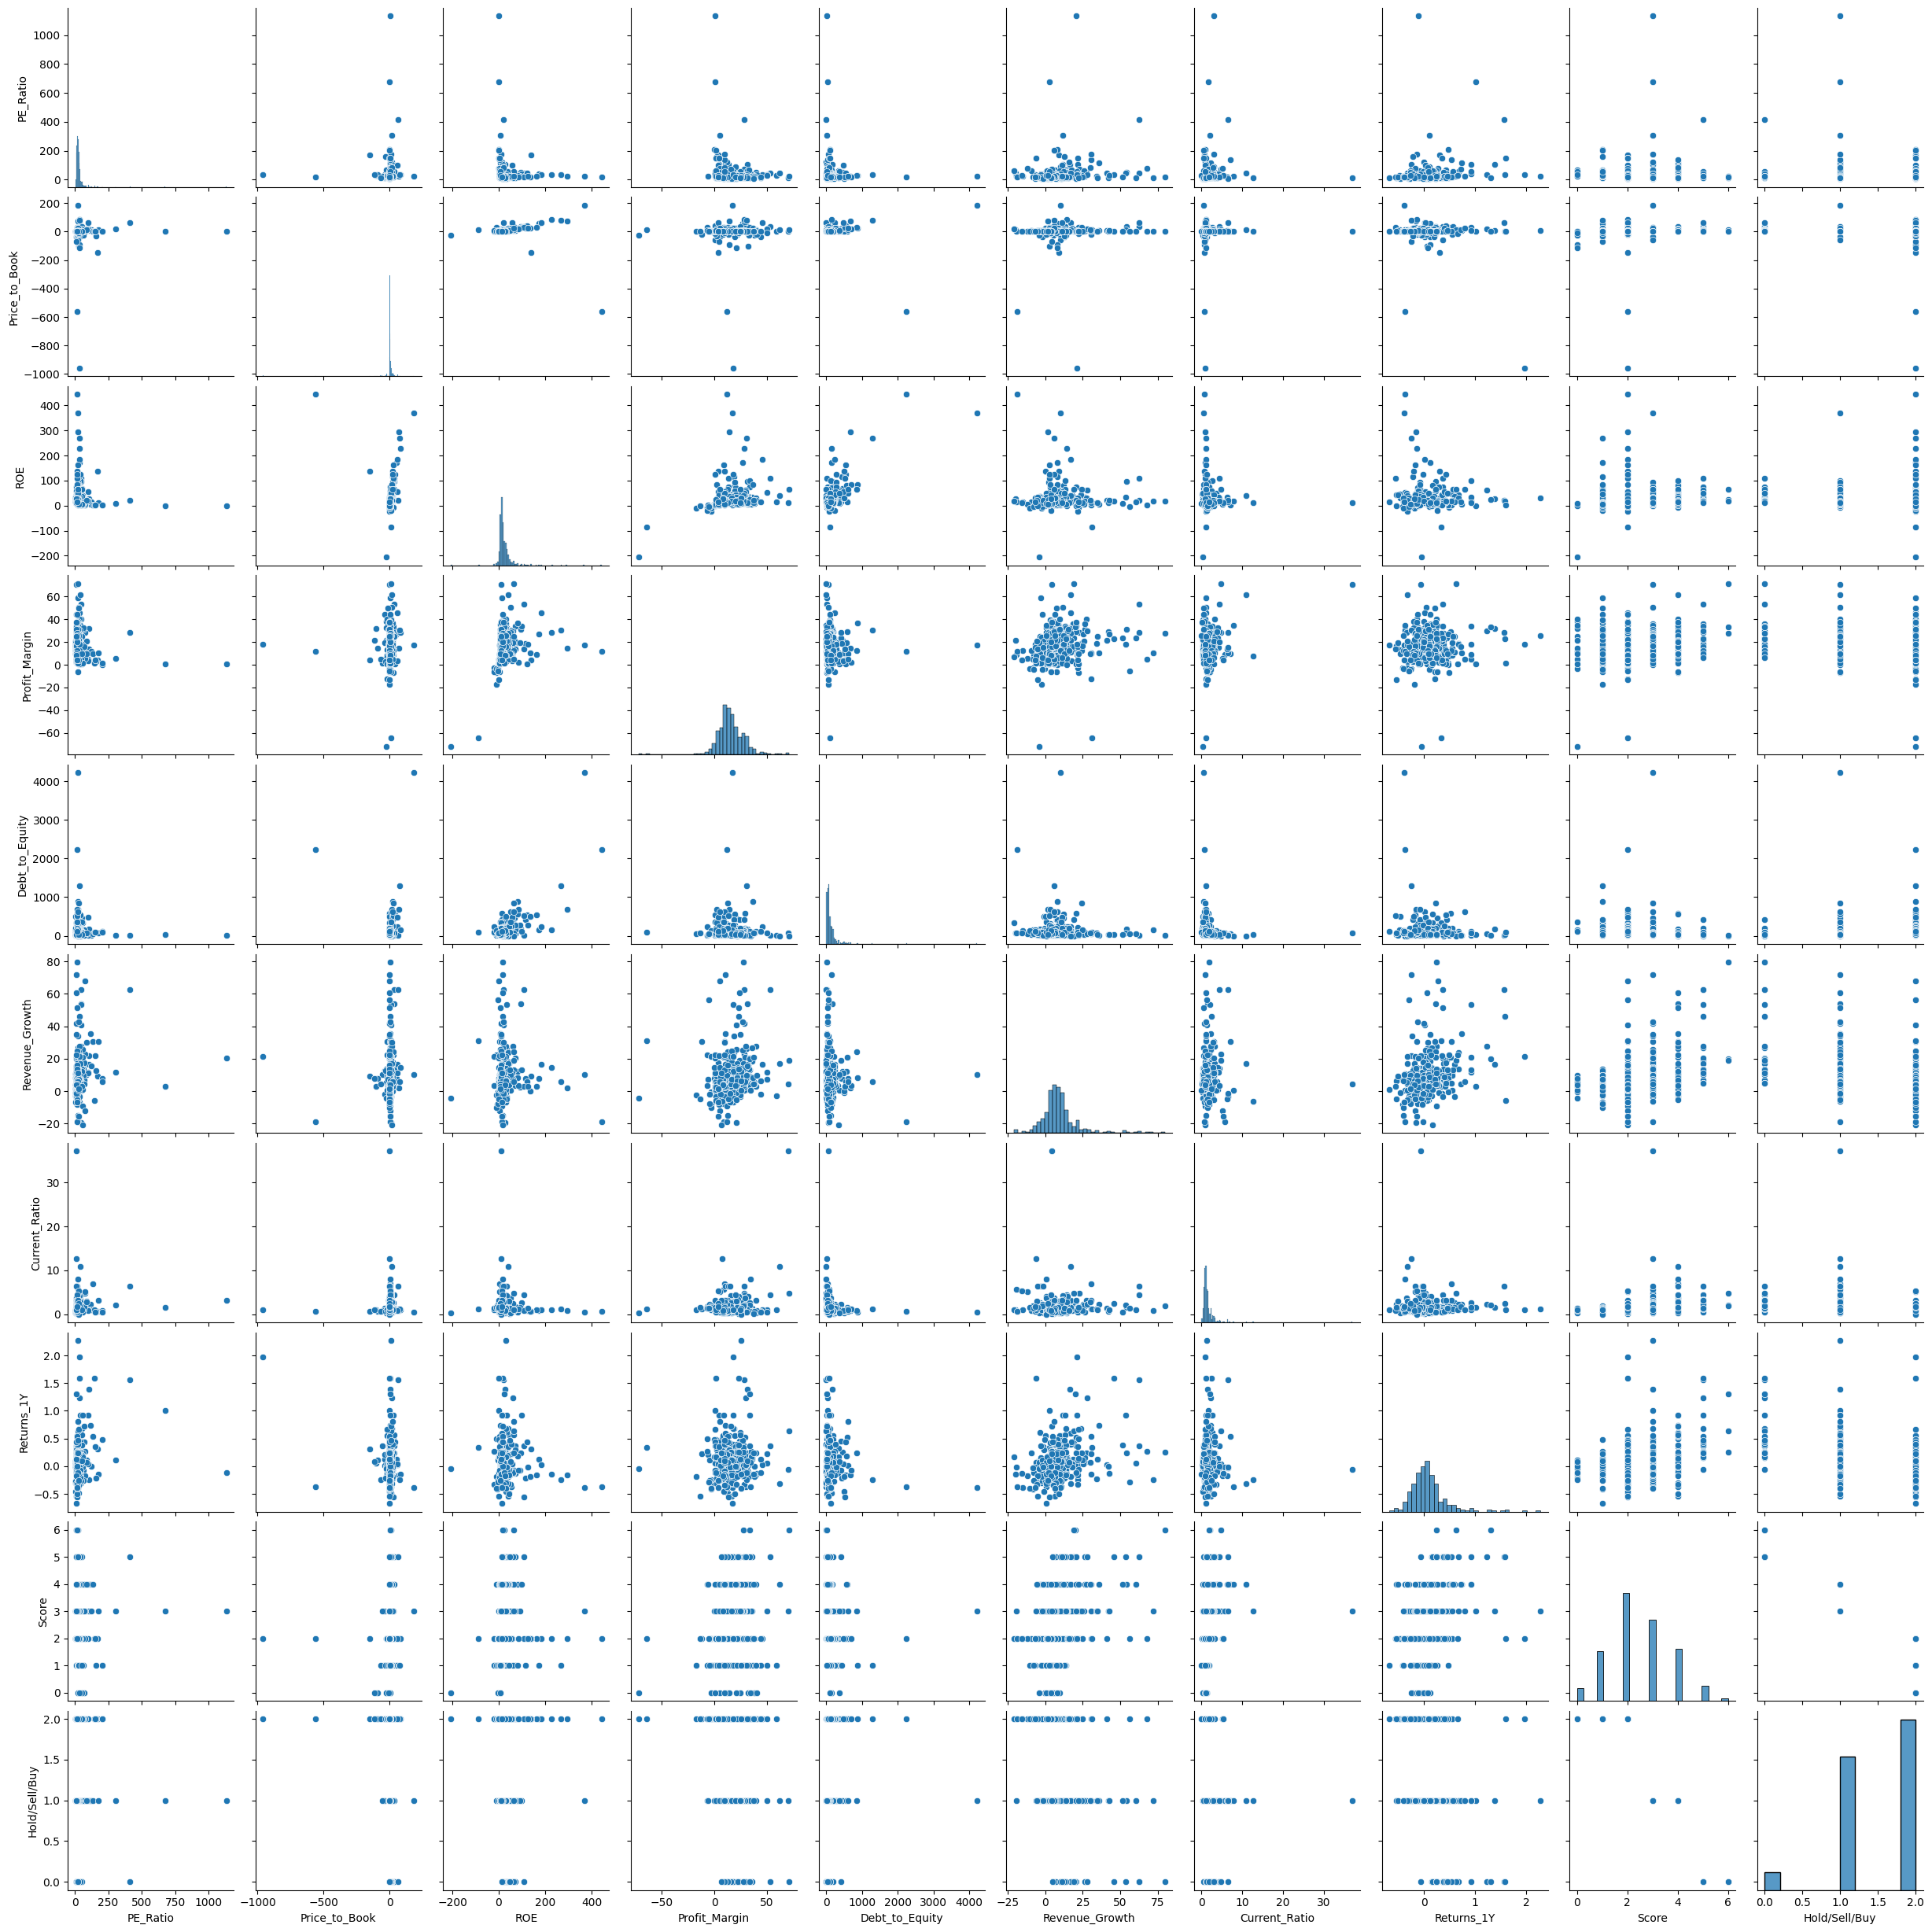

In [89]:
sns.pairplot(df1)